In [4]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 43.4 MB/s eta 0:00:00


In [3]:
!wget --no-check-certificate 'https://public.sn.files.1drv.com/y4mc3X5F_m3n-FvMNTr10PUoFKuQux_Xu-63jgMW4PhA0ODjmbcdx0S0_q_55F8ZDKgSMpjSdgE4c_PE07s3rAlXTa0GYOudcsEUqFHYSNNGnctuGpZHjHAh48ksYr3Vftmvw1icsPXE1AEYPCcjswbGdAg1QFItnFoPJ3JNEAeZ0Q7_Gexm_wcVwswFlxsswGzhEm4PxWUIWwNNJWNdVIC2bR-gWpsGGRVDDWXFQx3HRs?AVOverride=1' -O ChamanHH.tif

--2023-12-22 06:46:11--  https://public.sn.files.1drv.com/y4mc3X5F_m3n-FvMNTr10PUoFKuQux_Xu-63jgMW4PhA0ODjmbcdx0S0_q_55F8ZDKgSMpjSdgE4c_PE07s3rAlXTa0GYOudcsEUqFHYSNNGnctuGpZHjHAh48ksYr3Vftmvw1icsPXE1AEYPCcjswbGdAg1QFItnFoPJ3JNEAeZ0Q7_Gexm_wcVwswFlxsswGzhEm4PxWUIWwNNJWNdVIC2bR-gWpsGGRVDDWXFQx3HRs?AVOverride=1
Resolving public.sn.files.1drv.com (public.sn.files.1drv.com)... 13.107.42.12
Connecting to public.sn.files.1drv.com (public.sn.files.1drv.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54520620 (52M) [image/tiff]
Saving to: ‘ChamanHH.tif’

ChamanHH.tif        100%[===================>]  51.99M  17.4MB/s    in 3.0s    

2023-12-22 06:46:15 (17.4 MB/s) - ‘ChamanHH.tif’ saved [54520620/54520620]



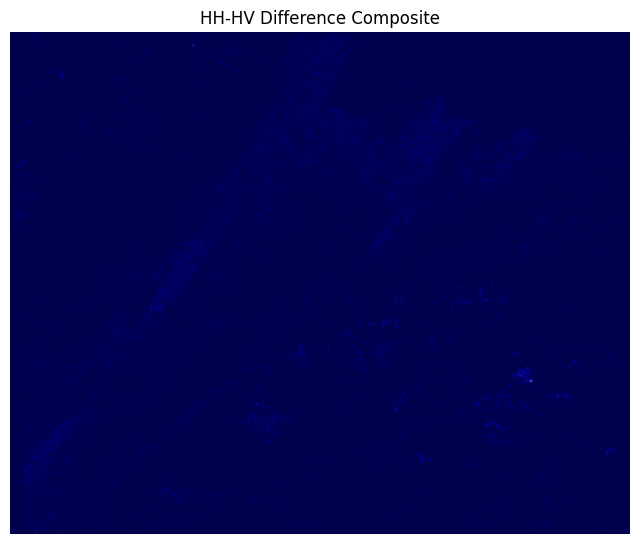

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

hh_tif_path = "ChamanHH.tif"
hv_tif_path = "ChamanHV.tif"

with rasterio.open(hh_tif_path) as hh_dataset, rasterio.open(hv_tif_path) as hv_dataset:
    hh_data = hh_dataset.read(1)
    hv_data = hv_dataset.read(1)

hh_normalized = (hh_data - np.min(hh_data)) / (np.max(hh_data) - np.min(hh_data))
hv_normalized = (hv_data - np.min(hv_data)) / (np.max(hv_data) - np.min(hv_data))

difference = hh_normalized - hv_normalized

colormap = plt.get_cmap("seismic")
difference_colormap = (colormap(difference)[:, :, :3] * 255).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(difference_colormap)
plt.title("HH-HV Difference Composite")
plt.axis('off')

plt.show()
